In [5]:
import pandas as pd
import matplotlib.pyplot as plt
movie_reviews=pd.read_csv("F:/education/data quest/analysing movie reviews/fandango_score_comparison.csv")
movie_reviews.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
from scipy.stats.stats import pearsonr

In [6]:
r, p_value=pearsonr(movie_reviews["Fandango_Stars"],movie_reviews["Metacritic_norm_round"])

In [7]:
print(r)

0.17844919073895918


As we see the correlation is very low, hence there is no significant relationship between "Fandango_Stars" and "Metacritic_norm_round"

In [9]:
from numpy import cov
slope = cov (movie_reviews["Metacritic_norm_round"],movie_reviews["Fandango_Stars"])[0,1]/movie_reviews["Fandango_Stars"].var()
print(slope)

0.32724037528307953


slope = m = covariance(x,y)/variance of x

In [11]:
y_intercept=movie_reviews["Fandango_Stars"].mean() -slope * (movie_reviews["Metacritic_norm_round"].mean())
print(y_intercept)

3.1162854597749554


intercept = mean(y)- m * mean(x)

Assuming the dependency of fandango on metric scale by the formula given below, let us try to predict the fadango as given below
predict_3 = 3 * slope + y_intercept(to find value of fadango when metacentric input is 3)

In [12]:
predict_3 = 3 * slope + y_intercept
print(predict_3)

4.098006585624194


(array([ 1.,  0.,  2.,  0.,  0., 20.,  0., 14.,  0.,  0., 22.,  0., 27.,
         0.,  0., 20.,  0., 25.,  0., 15.]),
 array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9,
        3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5]),
 <a list of 20 Patch objects>)

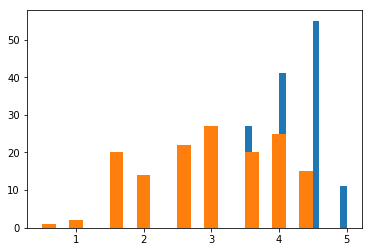

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movie_reviews["Fandango_Stars"],20)
plt.hist(movie_reviews["Metacritic_norm_round"],20)

like we compare them with histogram and we find no commanalities.

In [27]:
fadango_mean=movie_reviews["Fandango_Stars"].mean()
metric_norm_mean=movie_reviews["Metacritic_norm_round"].mean()
fadango_median=movie_reviews["Fandango_Stars"].median()
metric_norm_median=movie_reviews["Metacritic_norm_round"].median()
fadango_std_dev=movie_reviews["Fandango_Stars"].std()
metric_norm_std_dev=movie_reviews["Metacritic_norm_round"].std()



print("MEANS OF FADANGO FOLLOWED BY METACRITIC_NORM_ROUND\n")
print(fadango_mean)
print(metric_norm_mean)
print("\n")
print("MEDIANS OF FADANGO FOLLOWED BY METACRITIC_NORM_ROUND\n ")
print(fadango_median)
print(metric_norm_median)
print("\n")
print("std-deviations OF FADANGO FOLLOWED BY METACRITIC_NORM_ROUND \n")
print(fadango_std_dev)
print(metric_norm_std_dev)


MEANS OF FADANGO FOLLOWED BY METACRITIC_NORM_ROUND

4.089041095890411
2.9726027397260273


MEDIANS OF FADANGO FOLLOWED BY METACRITIC_NORM_ROUND
 
4.0
3.0


std-deviations OF FADANGO FOLLOWED BY METACRITIC_NORM_ROUND 

0.5403859779787333
0.9909605613743364


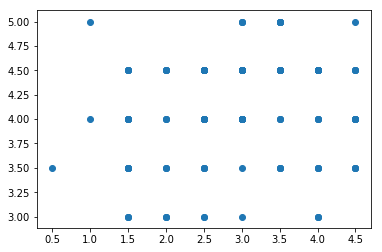

In [28]:
plt.scatter(movie_reviews["Metacritic_norm_round"],movie_reviews["Fandango_Stars"])

In [32]:
movie_reviews["fm_diff"]=movie_reviews["Metacritic_norm_round"]-movie_reviews["Fandango_Stars"]
fm_diff=abs(movie_reviews["fm_diff"])
movie_reviews.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0,1.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0,1.0
119,Phoenix (2015),99,81,91,8.0,7.2,3.5,3.4,4.95,4.05,...,5.0,4.0,4.5,4.0,3.5,21,3687,70,0.1,1.0
69,Mr. Turner (2014),98,56,94,6.6,6.9,3.5,3.2,4.90,2.80,...,5.0,3.0,4.5,3.5,3.5,98,13296,290,0.3,1.0
115,While We're Young (2015),83,52,76,6.7,6.4,3.0,2.9,4.15,2.60,...,4.0,2.5,4.0,3.5,3.0,65,17647,449,0.1,1.0


we will create a residual plot to see if any relationship exists

In [33]:
predict_1 = 1 * slope + y_intercept
print(predict_1)

3.443525835058035


In [34]:
predict_5 = 5 * slope + y_intercept
print(predict_5)


4.752487336190353


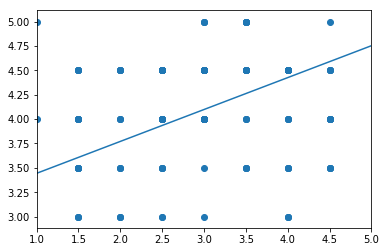

In [37]:
plt.scatter(movie_reviews["Metacritic_norm_round"], movie_reviews["Fandango_Stars"])
plt.plot([1,5],[predict_1,predict_5 ])
plt.xlim(1,5)
plt.show()